# DATA WRANGLING

## Step 1

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
label = LabelEncoder()
onehot=OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
scaler = StandardScaler()

## Step 2

In [5]:
# Loading the Dataset and rounding numbers to 2 decimal places
dropouts = pd.read_csv('data.csv', delimiter=';')
school_rd = dropouts.drop('Target',axis=1).round(2)
dropouts_concat = pd.concat([school_rd,dropouts['Target']],axis=1)
school = dropouts_concat.copy()
school.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


In [6]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
school.rename(columns={'Nacionality' :'Nationality', 'Daytime/evening attendance\t':'Daytime/evening attendance'},inplace=True)

In [8]:
# Checking the number of rows and columns
school.shape

(4424, 37)

In [9]:
# Checking the datatypes
print(school.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
school.iloc[:,:18].describe().round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,10.96,11.03,126.98,0.55,0.01,0.11,0.88,0.35
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,26.42,25.26,14.48,0.50,0.11,0.32,0.32,0.48
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,0.00,0.00,95.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,4.00,4.00,117.90,0.00,0.00,0.00,1.00,0.00
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,5.00,7.00,126.10,1.00,0.00,0.00,1.00,0.00
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,9.00,9.00,134.80,1.00,0.00,0.00,1.00,1.00
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,194.00,195.00,190.00,1.00,1.00,1.00,1.00,1.00


In [11]:
school['Curricular units 1st sem (without evaluations)'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 12], dtype=int64)

In [12]:
school['Curricular units 2nd sem (without evaluations)'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 12], dtype=int64)

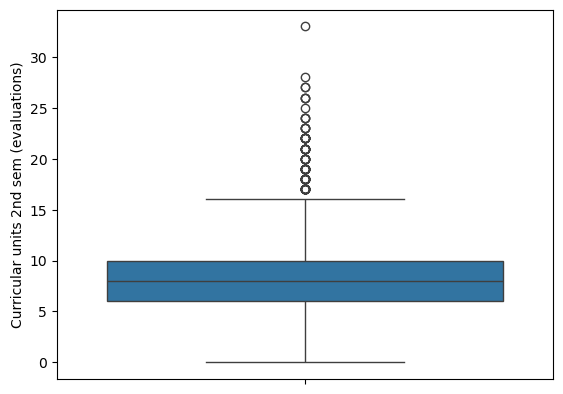

In [13]:
sns.boxplot(school['Curricular units 2nd sem (evaluations)'])
plt.show()

In [14]:
school.loc[school['Application order']==9,'Application order' ]=7
school['Application order'].unique()

array([5, 1, 2, 4, 3, 6, 7, 0], dtype=int64)

In [15]:
school.iloc[:,18:].describe().round(2)

,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,0.25,23.27,0.02,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,0.43,7.59,0.16,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,0.00,19.00,0.00,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,0.00,20.00,0.00,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,0.00,25.00,0.00,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,1.00,70.00,1.00,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


In [16]:
# Checking for missing values
print(school.isna().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [17]:
# Checking for duplicted rows
school.duplicated().sum()

0

In [18]:
school['Marital status'].sort_values().unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [19]:
school['Application mode'].sort_values().unique()

array([ 1,  2,  5,  7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53,
       57], dtype=int64)

In [20]:
school["Previous qualification"].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14],
      dtype=int64)

In [21]:
school['Tuition fees up to date'].unique()

array([1, 0], dtype=int64)

## Step 3

In [23]:
# Encoding the Categorical variables and the imbalanced ones
encode_variables = ['Marital status','Application mode','Target','Application order','Previous qualification','Nationality',"Mother's qualification","Father's qualification","Mother's occupation","Father's occupation",'Course','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)']

for variable in encode_variables:
    school[f'{variable}_encoded']=label.fit_transform(school[f'{variable}'])


school.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (credited)_encoded,Curricular units 1st sem (enrolled)_encoded,Curricular units 1st sem (evaluations)_encoded,Curricular units 1st sem (approved)_encoded,Curricular units 1st sem (without evaluations)_encoded,Curricular units 2nd sem (credited)_encoded,Curricular units 2nd sem (enrolled)_encoded,Curricular units 2nd sem (evaluations)_encoded,Curricular units 2nd sem (approved)_encoded,Curricular units 2nd sem (without evaluations)_encoded
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727396,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.709991,6.267405,8.292722,4.705696,0.136528,0.541139,6.231013,8.062387,4.431962,0.148960
std,0.605747,17.484682,1.311632,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,2.360507,2.460112,4.133701,3.088594,0.673375,1.912423,2.187973,3.942693,2.998437,0.734911
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,3.000000,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,0.000000,0.000000,6.000000,8.000000,5.000000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,0.000000,0.000000,7.000000,10.000000,6.000000,0.000000
max,6.000000,57.000000,7.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,20.000000,22.000000,34.000000,22.000000,10.000000,18.000000,21.000000,29.000000,19.000000,9.000000


In [24]:
school.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (credited)_encoded,Curricular units 1st sem (enrolled)_encoded,Curricular units 1st sem (evaluations)_encoded,Curricular units 1st sem (approved)_encoded,Curricular units 1st sem (without evaluations)_encoded,Curricular units 2nd sem (credited)_encoded,Curricular units 2nd sem (enrolled)_encoded,Curricular units 2nd sem (evaluations)_encoded,Curricular units 2nd sem (approved)_encoded,Curricular units 2nd sem (without evaluations)_encoded
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727396,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.709991,6.267405,8.292722,4.705696,0.136528,0.541139,6.231013,8.062387,4.431962,0.148960
std,0.605747,17.484682,1.311632,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,2.360507,2.460112,4.133701,3.088594,0.673375,1.912423,2.187973,3.942693,2.998437,0.734911
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,3.000000,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,0.000000,0.000000,6.000000,8.000000,5.000000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,0.000000,0.000000,7.000000,10.000000,6.000000,0.000000
max,6.000000,57.000000,7.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,20.000000,22.000000,34.000000,22.000000,10.000000,18.000000,21.000000,29.000000,19.000000,9.000000


## Step 4

# Numerical Column Nomalizing

In [27]:
#Checking the variance of the numeric variables
num = ['Age at enrollment','Previous qualification (grade)','Admission grade', 'Unemployment rate','Inflation rate','GDP','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']
numeric_values = school[num]
numeric_values.var()

Age at enrollment                    57.574946
Previous qualification (grade)      173.932093
Admission grade                     209.728348
Unemployment rate                     7.096099
Inflation rate                        1.911889
GDP                                   5.152607
Curricular units 1st sem (grade)     23.461102
Curricular units 2nd sem (grade)     27.152633
dtype: float64

In [28]:
numeric_values.var()

Age at enrollment                    57.574946
Previous qualification (grade)      173.932093
Admission grade                     209.728348
Unemployment rate                     7.096099
Inflation rate                        1.911889
GDP                                   5.152607
Curricular units 1st sem (grade)     23.461102
Curricular units 2nd sem (grade)     27.152633
dtype: float64

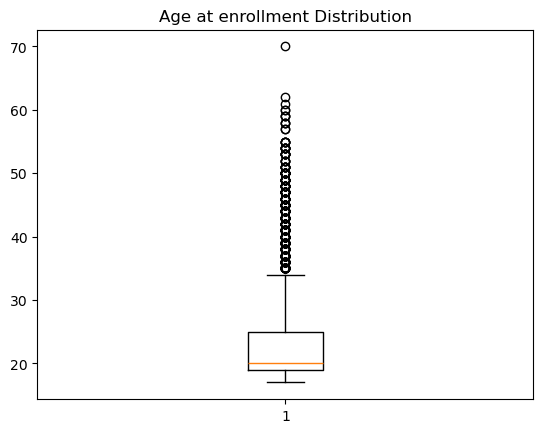

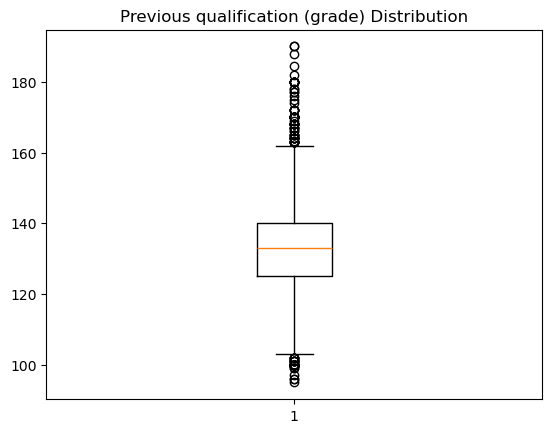

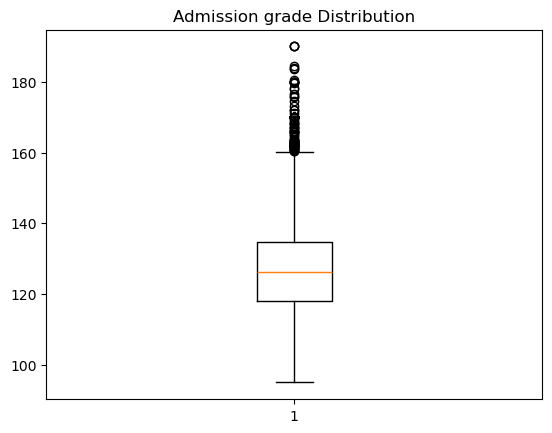

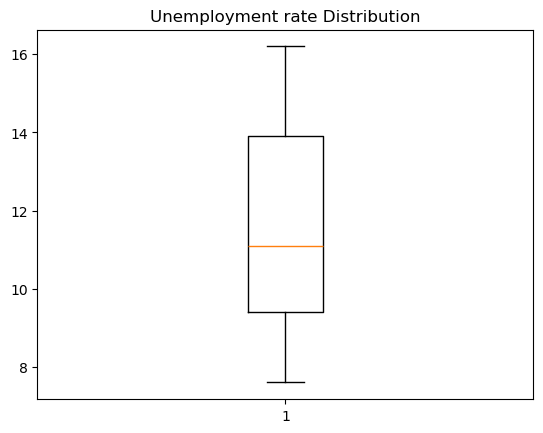

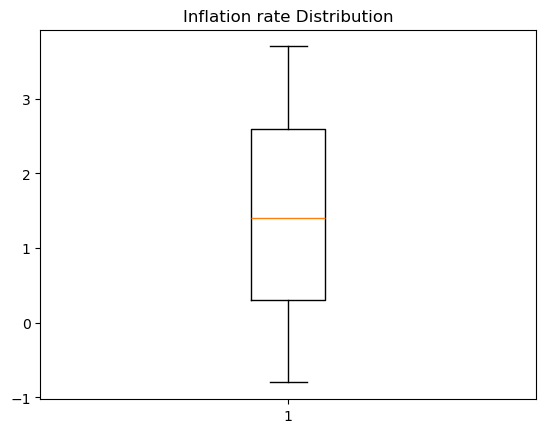

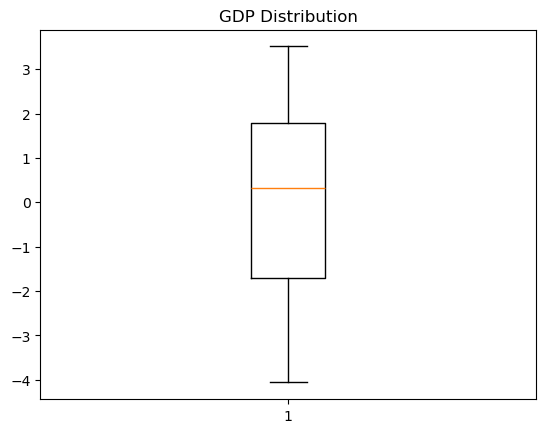

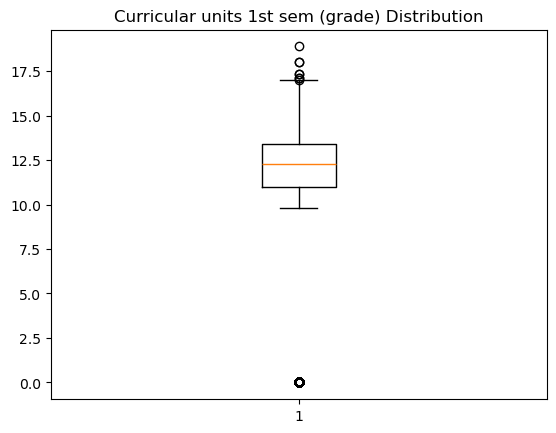

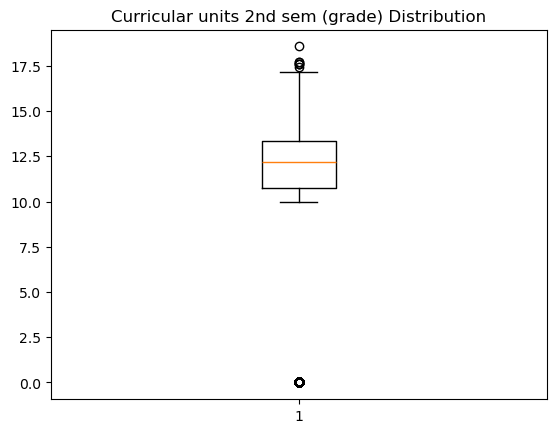

In [29]:
# Checking the distribution of the numeric variables
for numeric in num:
    plt.boxplot(school[f'{numeric}'])
    plt.title(f'{numeric} Distribution')
    plt.show()

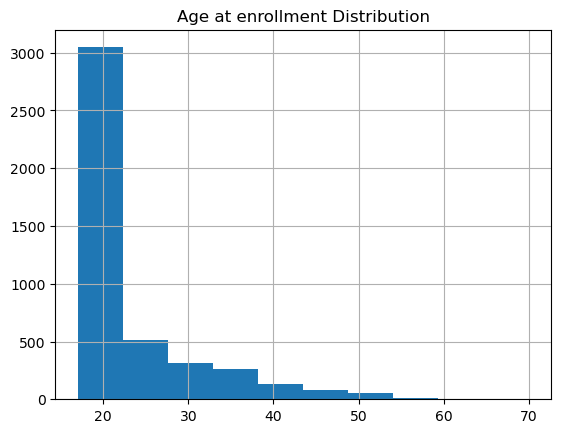

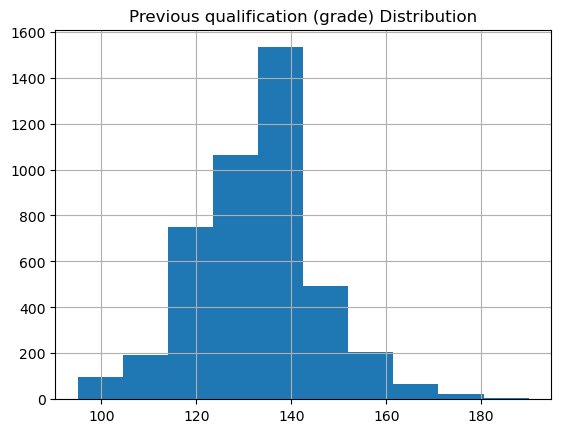

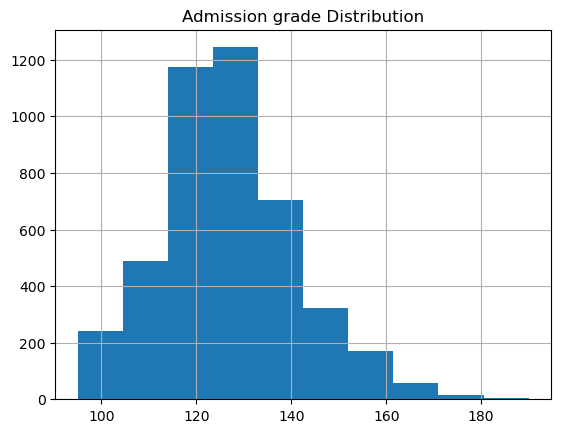

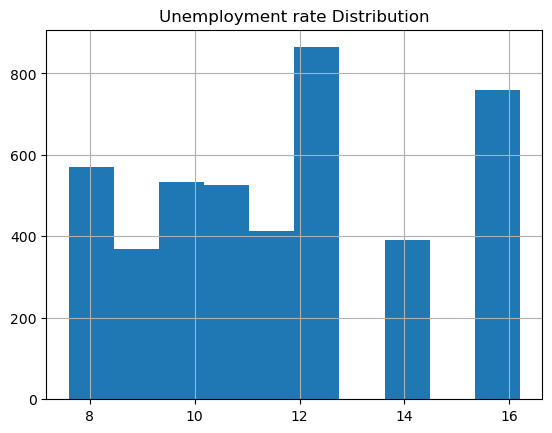

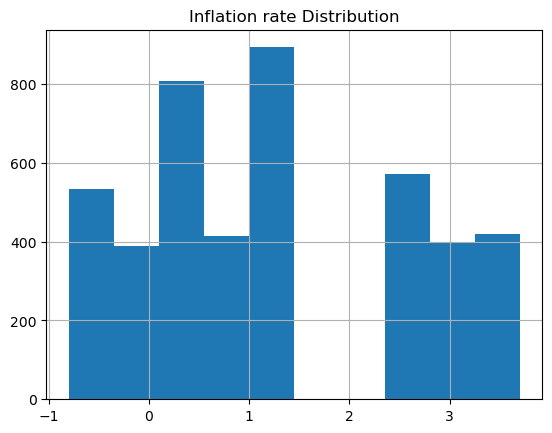

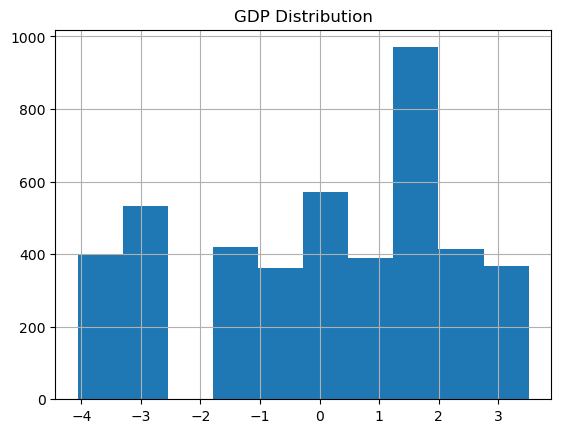

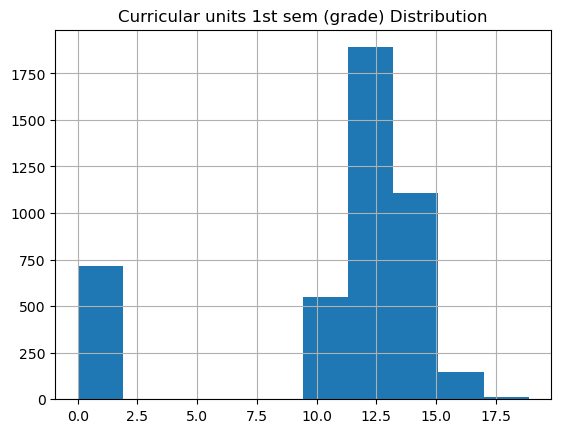

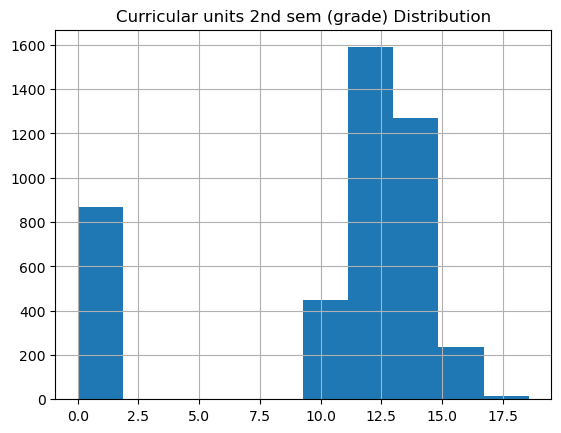

In [30]:
# Checking the distribution of the numeric variables
for numeric in numeric_values:
    school[f'{numeric}'].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

In [31]:
# Scaling the numeric variables
normalized_values = scaler.fit_transform(numeric_values)
df = pd.DataFrame(normalized_values)
df.columns = numeric_values.columns
for column in df.columns:
    df[f'{column}_encoded'] = df[f'{column}']
df
# df[f'{numeric}_encoded']

,Age at enrollment,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Age at enrollment_encoded,Previous qualification (grade)_encoded,Admission grade_encoded,Unemployment rate_encoded,Inflation rate_encoded,GDP_encoded,Curricular units 1st sem (grade)_encoded,Curricular units 2nd sem (grade)_encoded
0,-0.430363,-0.804841,0.022229,-0.287638,0.124386,0.765761,-2.197107,-1.963484,-0.430363,-0.804841,0.022229,-0.287638,0.124386,0.765761,-2.197107,-1.963484
1,-0.562168,2.076819,1.071926,0.876222,-1.105222,0.347199,0.693593,0.660201,-0.562168,2.076819,1.071926,0.876222,-1.105222,0.347199,0.693593,0.660201
2,-0.562168,-0.804841,-0.150419,-0.287638,0.124386,0.765761,-2.197107,-1.963484,-0.562168,-0.804841,-0.150419,-0.287638,0.124386,0.765761,-2.197107,-1.963484
3,-0.430363,-0.804841,-0.509526,-0.813253,-1.466871,-1.375511,0.575900,0.416450,-0.430363,-0.804841,-0.509526,-0.813253,-1.466871,-1.375511,0.575900,0.416450
4,2.864765,-2.473171,1.002867,0.876222,-1.105222,0.347199,0.348774,0.531608,2.864765,-2.473171,1.002867,0.876222,-1.105222,0.347199,0.348774,0.531608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.562168,-0.577342,-0.329972,1.476924,1.137005,-1.789667,0.611001,0.468271,-0.562168,-0.577342,-0.329972,1.476924,1.137005,-1.789667,0.611001,0.468271
4420,-0.693973,-0.956508,-0.550961,-0.175007,-0.454253,0.889126,0.280636,0.147748,-0.693973,-0.956508,-0.550961,-0.175007,-0.454253,0.889126,0.280636,0.147748
4421,0.887688,1.621820,1.555339,0.876222,-1.105222,0.347199,0.881488,0.627573,0.887688,1.621820,1.555339,0.876222,-1.105222,0.347199,0.881488,0.627573
4422,-0.430363,3.593483,1.852293,-0.813253,-1.466871,-1.375511,0.652297,0.339678,-0.430363,3.593483,1.852293,-0.813253,-1.466871,-1.375511,0.652297,0.339678


In [32]:
# Dropping the unscaled variables
for unit in num:
    df.drop(f'{unit}', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age at enrollment_encoded                 4424 non-null   float64
 1   Previous qualification (grade)_encoded    4424 non-null   float64
 2   Admission grade_encoded                   4424 non-null   float64
 3   Unemployment rate_encoded                 4424 non-null   float64
 4   Inflation rate_encoded                    4424 non-null   float64
 5   GDP_encoded                               4424 non-null   float64
 6   Curricular units 1st sem (grade)_encoded  4424 non-null   float64
 7   Curricular units 2nd sem (grade)_encoded  4424 non-null   float64
dtypes: float64(8)
memory usage: 276.6 KB


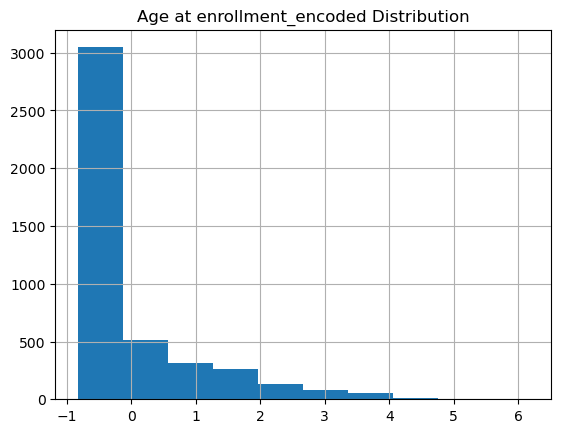

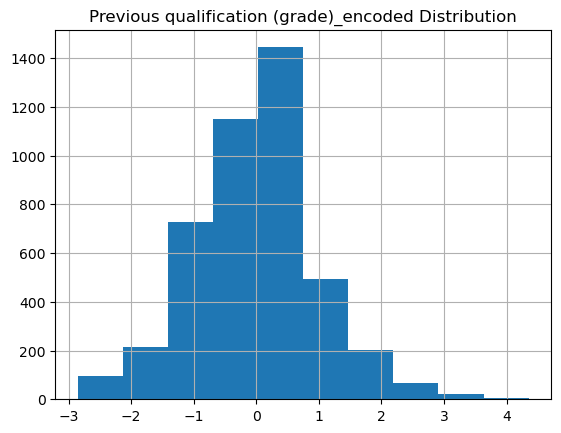

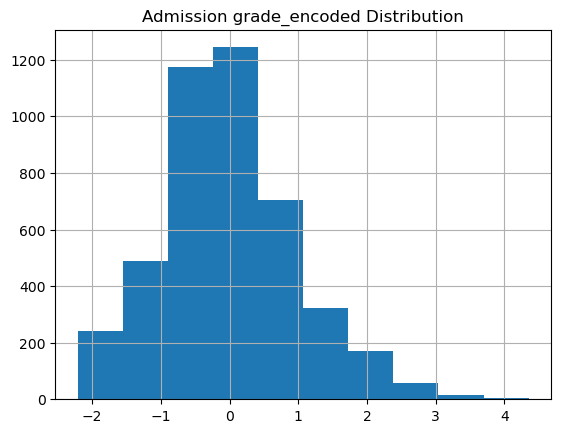

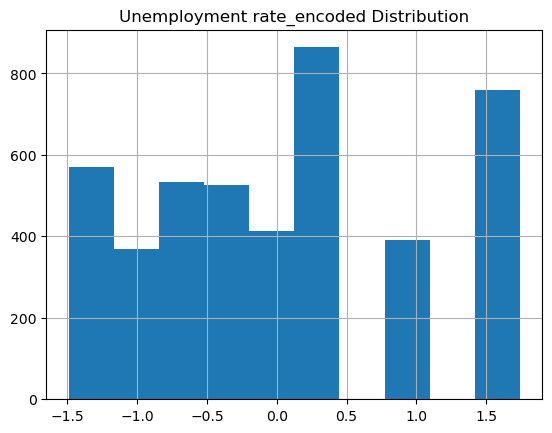

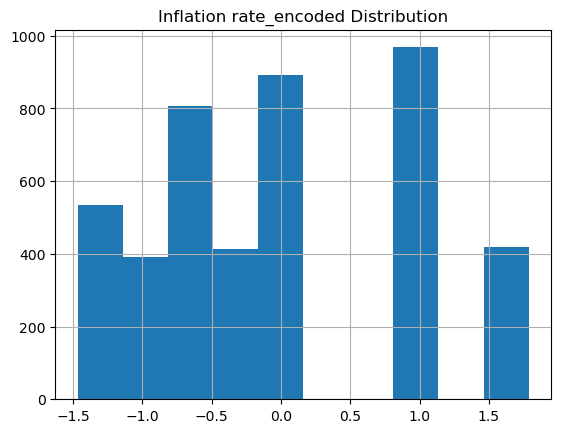

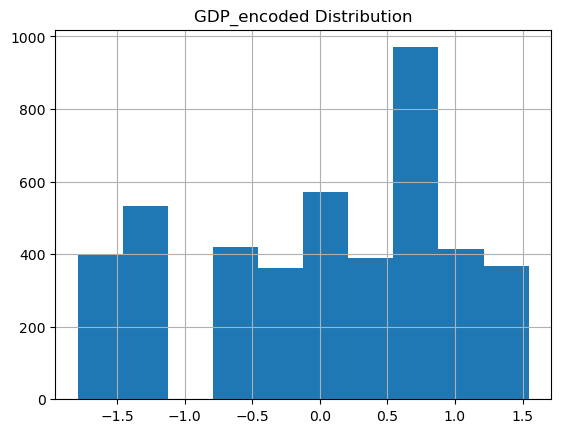

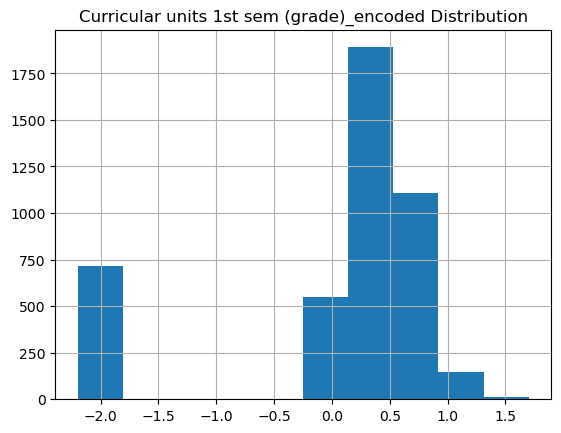

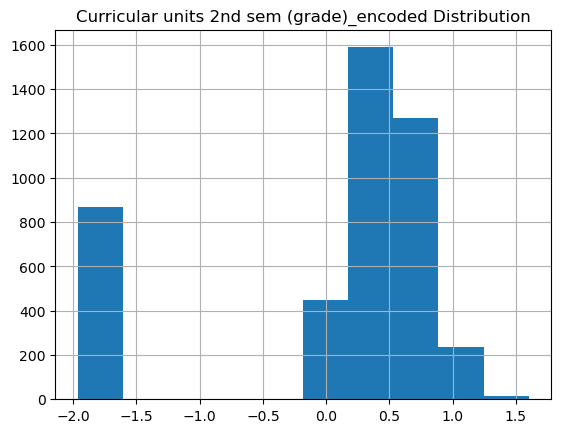

In [33]:
#Checking the scaled distribution
for numeric in df:
    df[f'{numeric}'].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

In [34]:
df.var()

Age at enrollment_encoded                   1.000226
Previous qualification (grade)_encoded      1.000226
Admission grade_encoded                     1.000226
Unemployment rate_encoded                   1.000226
Inflation rate_encoded                      1.000226
GDP_encoded                                 1.000226
Curricular units 1st sem (grade)_encoded    1.000226
Curricular units 2nd sem (grade)_encoded    1.000226
dtype: float64

In [35]:
# Adding the scaled features
dropout = pd.concat([school,df],axis=1)
dropout.iloc[:,37:].describe()

,Marital status_encoded,Application mode_encoded,Target_encoded,Application order_encoded,Previous qualification_encoded,Nationality_encoded,Mother's qualification_encoded,Father's qualification_encoded,Mother's occupation_encoded,Father's occupation_encoded,...,Curricular units 2nd sem (approved)_encoded,Curricular units 2nd sem (without evaluations)_encoded,Age at enrollment_encoded,Previous qualification (grade)_encoded,Admission grade_encoded,Unemployment rate_encoded,Inflation rate_encoded,GDP_encoded,Curricular units 1st sem (grade)_encoded,Curricular units 2nd sem (grade)_encoded
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,0.178571,5.886980,1.178119,1.727396,1.531420,0.254521,11.322107,15.455244,6.317812,6.819168,...,4.431962,0.148960,-1.027910e-16,-3.589654e-16,-9.708930e-16,-5.460771e-17,1.445498e-16,2.569775e-17,-1.284887e-16,-1.188521e-16
std,0.605747,5.298964,0.888243,1.311632,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,...,2.998437,0.734911,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-8.257782e-01,-2.852337e+00,-2.208378e+00,-1.489043e+00,-1.466871e+00,-1.789667e+00,-2.197107e+00,-1.963484e+00
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,4.000000,4.000000,...,2.000000,0.000000,-5.621680e-01,-5.773417e-01,-6.269262e-01,-8.132529e-01,-6.712423e-01,-7.498721e-01,7.415725e-02,9.976505e-02
50%,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,12.000000,13.000000,5.000000,7.000000,...,5.000000,0.000000,-4.303628e-01,3.690696e-02,-6.064208e-02,-1.750068e-01,1.243865e-01,1.401217e-01,3.405145e-01,3.780637e-01
75%,0.000000,11.000000,2.000000,2.000000,0.000000,0.000000,21.000000,26.000000,9.000000,9.000000,...,6.000000,0.000000,2.286628e-01,5.601559e-01,5.401715e-01,8.762221e-01,9.923451e-01,7.877904e-01,5.697057e-01,5.949447e-01
max,5.000000,17.000000,2.000000,7.000000,16.000000,20.000000,28.000000,33.000000,31.000000,45.000000,...,19.000000,9.000000,6.159894e+00,4.351815e+00,4.352230e+00,1.739731e+00,1.787974e+00,1.545607e+00,1.701208e+00,1.600659e+00


## Step 5

In [37]:
# Converting the cleaned data to csv format
dropout.to_csv('cleaned_data.csv',index=False)